# Digital World Week 10
- adapted from Norman's notebooks

In [1]:
import numpy as np
from sklearn import datasets
bunchobject = datasets.load_breast_cancer()
import matplotlib.pyplot as plt

In [2]:
def display_scatter(x,y, xlabel='x', ylabel='y',title_name ='default'): 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(x,y)
    plt.show()

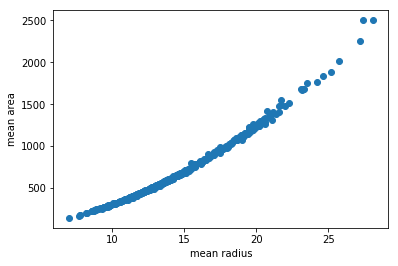

In [3]:
x_index = 0
y_index = 3

x = bunchobject.data[:,x_index]
y = bunchobject.data[:,y_index]

x_label = bunchobject.feature_names[x_index]
y_label = bunchobject.feature_names[y_index]

display_scatter(x,y,x_label,y_label)

## Extracting one column from a numpy array gives you a 1D list i.e. a list of n elements. 

### the <font color = 'blue'>.shape </font> method gives you the dimensions of the array. The output tells you: 
<ul>
<li> 1D array:  <font color = 'blue'> ( number of elements, ) </font>
<li> 2D array <font color = 'blue'> (rows , columns) </font>
</ul>

### the <font color = 'blue'>np.newaxis </font> parameter increases the dimensions by 1.
<ul>
<li> add a row dimension:  <font color = 'blue'>a[np.newaxis,:] </font>
<li> add a column dimension <font color = 'blue'>a[:,np.newaxis] </font>
</ul>

### A <font color = 'red'> 1D array </font> is like a list - there is no concept of rows or columns, just elements. 

### If you want a <font color = 'red'> 2D array </font>  ( n rows by 1 column array) then use the np.newaxis parameter to add a new dimension. 

In [4]:
z1 = np.array( range(10))
print('==this is a 1D array ==')
print(z1.shape)
print(z1)

print('\n==this is a 2D array ==')
z2 = z1[:,np.newaxis] # add a column
print(z2.shape)
print(z2)
# this looks neater and shows up like a column

print('\n==this is a 2D array ==')
z3 = z1[np.newaxis,:] # add a row
print(z3.shape)
print(z3)

==this is a 1D array ==
(10,)
[0 1 2 3 4 5 6 7 8 9]

==this is a 2D array ==
(10, 1)
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]

==this is a 2D array ==
(1, 10)
[[0 1 2 3 4 5 6 7 8 9]]


Visualising the dimensions of the the breast cancer dataset

In [5]:
print('==this is a 1D array==')
x1 = bunchobject.data[:, 0]
print(x1.shape)
#print(x1)

print('==this is a 2D n by 1 array==')
x2 = bunchobject.data[:, np.newaxis, 0] # add a column
print(x2.shape)
#print(x2)

print('==this is a 2D 1 by n array==')
print('you are not likely to need this')
x3 = bunchobject.data[np.newaxis, :, 0] # add a row
print(x3.shape)
#print(x3)

==this is a 1D array==
(569,)
==this is a 2D n by 1 array==
(569, 1)
==this is a 2D 1 by n array==
you are not likely to need this
(1, 569)


# LINEAR REGRESSION

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression(bunchobject, x_index, y_index, size, seed):
    '''extracting the data'''
    data = bunchobject.data
    x = data[:, np.newaxis, x_index]
    y = data[:, np.newaxis, y_index]
    
    '''split the data into the training and test set'''
    '''size = fraction of records in the test set'''
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = size, random_state = seed)
    
    '''get an instance of the Linear Regression Classifier'''
    regr = linear_model.LinearRegression()
    
    '''fit the model into the training set to get the equation'''
    regr.fit(x_train, y_train)
    
    '''predicte the y_values given x_values from the test set'''
    y_predicted = regr.predict(x_test)
    
    '''evaluate the error of the prediction from the test set'''
    mse = mean_squared_error(y_test,y_predicted)
    var = r2_score(y_test,y_predicted)
    
    '''creating the dictionary'''
    results = {}
    results['coefficients'] = regr.coef_
    results['intercept'] = regr.intercept_
    results['mean squared error'] = mse
    results['r2 score'] = var
    '''as stated in your problem set'''
    
    return x_train, y_train, x_test, y_predicted, results

In [7]:
x_train, y_train, x_test, y_pred, results = linear_regression(bunchobject,0,3,0.4,2752)

In [8]:
print(results)
# compare
{'coefficients': np.array([[ 100.16755386]]),
'intercept': np.array([-760.52027342]),
'mean squared error': 2631.2988797244757,
'r2 score': 0.97772539335215169}

{'coefficients': array([[100.16755386]]), 'intercept': array([-760.52027342]), 'mean squared error': 2631.2988797244757, 'r2 score': 0.9777253933521517}


{'coefficients': array([[100.16755386]]),
 'intercept': array([-760.52027342]),
 'mean squared error': 2631.2988797244757,
 'r2 score': 0.9777253933521517}

Exam notes: <BR>
Check that the requested dimensions is the same. <BR>
Do figure out what is the difference of the result of `np.shape`:
`(227,)`
`(227,1)`
`(1,227)` <BR>
SEED: please make use of the seed provided in the `train_test_split`

In [9]:
def plot_regression (x1, y1, x2, y2, x_label= '' , y_label= '' ): 
    plt.scatter(x1,y1, color='black',label='train')
    plt.scatter(x2,y2, color='red',label='test')
    plt.legend(loc="best")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

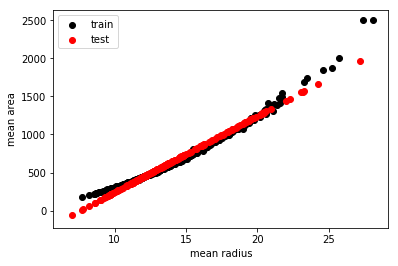

In [10]:
plot_regression(x_train, y_train, x_test, y_pred,
 bunchobject.feature_names[0],
 bunchobject.feature_names[3])

# POLYNOMIAL REGRESSION

In [11]:
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


def multiple_linear_regression(bunchobject, x_index, y_index, order, size, seed):
    '''extracting the data'''
    data = bunchobject.data
    x = data[:, np.newaxis, x_index]
    y = data[:, np.newaxis, y_index]
    
    '''polynomalising the x?'''
    '''need to understand WHAT IS GOING ON HERE'''
    poly = PolynomialFeatures(order,include_bias=False)
    c_data = poly.fit_transform(x,y)
    '''c_data is x_, x_**2, x_**3, x_**4 for each x_'''    
    
    '''split the data into the training and test set'''
    '''size = fraction of records in the test set'''
    x_train, x_test, y_train, y_test = train_test_split(c_data, y, test_size=size, random_state=seed)
    
    '''fit the model into the training set to get the equation'''
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_predicted = regr.predict(x_test)

    '''evaluate the error of the prediction from the test set'''
    mse = mean_squared_error(y_test,y_predicted)
    var = r2_score(y_test,y_predicted)
        
    '''creating the dictionary of results'''
    results = {}
    results['coefficients'] = np.array(regr.coef_.tolist())
    results['intercept'] = np.array(regr.intercept_)
    results['mean squared error'] = mse
    results['r2 score'] = var
    '''as stated in your problem set'''
    
    return x_train[:,0], y_train, x_test[:,0], y_predicted, results

In [12]:
x_train, y_train, x_test, y_pred, results = multiple_linear_regression(bunchobject,0,3,4,0.4,2752)

In [13]:
print(results)
# compare results
{'coefficients': np.array([[ -1.28141031e+02, 1.57502508e+01, -5.29186793e-01, 7.97220165e-03]]), 
 'intercept': np.array([459.72265999]), 
 'mean squared error': 145.64415629863078, 
 'r2 score': 0.99876708559521399}

{'coefficients': array([[-1.28141031e+02,  1.57502508e+01, -5.29186793e-01,
         7.97220165e-03]]), 'intercept': array([459.72265999]), 'mean squared error': 145.64415629857666, 'r2 score': 0.9987670855952144}


{'coefficients': array([[-1.28141031e+02,  1.57502508e+01, -5.29186793e-01,
          7.97220165e-03]]),
 'intercept': array([459.72265999]),
 'mean squared error': 145.64415629863078,
 'r2 score': 0.998767085595214}

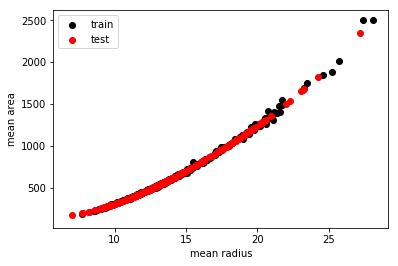

In [14]:
plot_regression(x_train, y_train, x_test, y_pred,
 bunchobject.feature_names[0],
 bunchobject.feature_names[3])

# KNN CLASSIFIERS - HELPER FUNCTIONS

### Normalising the data

Why normalize? The definition of "nearest" is by a distance measure. <BR>
The default distance measure is the Euclidean distance. <BR>
For features $x$ and $y$, the "distance" $= \sqrt{ (x_1 - x_2)^2 + (y_1 - y_2)^2}$

Any feature that has a larger order of magnitude will have a larger effect on this value. <BR>
Therefore we normalize to ensure that no single feature will dominate this calculation. 

In [15]:
def normalize_minmax(data):
    data = np.transpose(data)
    result = []
    for col in data:
        col -= np.min(col)
        col /= np.max(col)
        result.append(col)
    return np.transpose(result)
# I think there is a better way to do this?
# Try not to use `.append` because it is slow?

### Processing actual and predicted labels
To produce the required dictionary

In [16]:
def get_metrics(actual_labels, predicted_labels, labels):
    dict_ = {}
    cm = confusion_matrix(actual_labels, predicted_labels, labels)
    dict_["confusion matrix"] = cm
    dict_["total records"] = len(actual_labels)
    dict_["accuracy"] = np.round(sum([cm[i][i] for i in range(len(cm))])/len(actual_labels),3)
    dict_["false positive rate"] = np.round(cm[0][1]/(cm[0][1] + cm[0][0]),3)
    dict_["sensitivity"] = np.round(cm[1][1]/(cm[1][0] + cm[1][1]),3)
    return dict_

# KNN CLASSIFIERS - GIVEN K

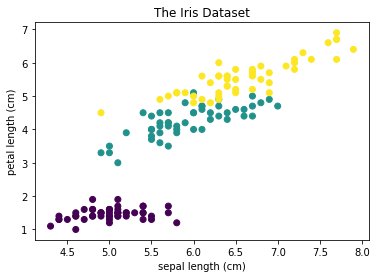

In [17]:
# an illustrating example
bunchobject = datasets.load_iris()
feature_index = [0,2]
my_data = bunchobject.data[:,feature_index]
plt.scatter(my_data[:,0],my_data[:,1],c=bunchobject.target)
my_x = bunchobject.feature_names[0]
my_y = bunchobject.feature_names[2]
plt.xlabel(my_x)
plt.ylabel(my_y)
plt.title('The Iris Dataset')
plt.show()

If we had a new record to classify,  we can compare it against its neighbours and use the classification of its neighbours. This is the intuition behind the k-nearest neighbours model. <font color = 'blue'> The classification of an (unknown) record is determined by the majority of the classifications of its <font color = 'red'> k </font> nearest neighbours.</font>

In [18]:
from sklearn.model_selection import train_test_split 
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix
import numpy as np

def knn_classifier(bunchobject, feature_list, size, seed, k): 
    '''load data'''
    bunchobject = datasets.load_breast_cancer()
    
    '''extract data'''
    data = bunchobject.data[:,feature_list]
    
    '''normalise data'''
    data = normalize_minmax(data)
    
    '''specify label'''
    '''in this context it refers to whether the tissue is cancerous or not'''
    label = bunchobject.target
    
    '''split training and test data'''
    data_train, data_test, label_train, label_test = train_test_split(
        data, label, test_size = size, random_state = seed)
    
    '''initialise classifier instance'''
    clf =  neighbors.KNeighborsClassifier(k)
    
    '''train the classifier with training data and labels'''
    clf.fit(data_train, label_train)
    
    '''predict the test data'''
    label_predicted = clf.predict(data_test)    
    
    '''calculate the accuracy of the prediction'''
    result = get_metrics(label_test, label_predicted, [0,1])
    return result

In [19]:
features = range(20)
results = knn_classifier(bunchobject, features, 0.40, 2752, 3)

In [20]:
# compare results
print(results)
{'confusion matrix': np.array([[ 73, 9],[ 5, 141]]), 
 'total records': 228, 
 'accuracy': 0.939,
 'sensitivity': 0.966,
 'false positive rate': 0.11}

{'confusion matrix': array([[ 73,   9],
       [  5, 141]]), 'total records': 228, 'accuracy': 0.939, 'false positive rate': 0.11, 'sensitivity': 0.966}


{'confusion matrix': array([[ 73,   9],
        [  5, 141]]),
 'total records': 228,
 'accuracy': 0.939,
 'sensitivity': 0.966,
 'false positive rate': 0.11}

# KNN CLASSIFIERS - FIND THE BEST K

In [21]:
# it requires the definition of other functions

def knn_classifier_full(bunchobject, feature_list, size, seed):
    '''terminologies: data-data, labels-label'''
    
    bunchobject = datasets.load_breast_cancer() # load data
    data = bunchobject.data[:,feature_list] # extract data
    data = normalize_minmax(data) # normalise data
    label = bunchobject.target # specify label
    
    '''training set: 60%, validation+test set 40%'''
    data_train, data_test, label_train, label_test = train_test_split(
        data, label, test_size = size, random_state = seed)
    
    '''validation set: 20%, test set 20%'''
    data_test1, data_test2, label_test1, label_test2 = train_test_split(
        data_test, label_test, test_size = 0.5, random_state = seed)
    
    # there may be a better way to do this
    '''initialise array of accuracy and results'''
    k_acc = []
    k_results = []
    
    for k in range(1,20): 
        clf =  neighbors.KNeighborsClassifier(k) # initialise classifier instance
        clf.fit(data_train, label_train) # train with training data and labels
        '''predict the VALIDATION labels with VALIDATION data'''
        label_predicted = clf.predict(data_test1)
        '''calculate the accuracy of the prediction of VALIDATION labels'''
        result = get_metrics(label_test1, label_predicted, [0,1])
        
        '''populate the array'''
        k_acc.append(result['accuracy'])
        k_results.append(result)
        
    '''find the value of k with the largest accuracy'''
    index = np.argmax(k_acc) # finding the index with the largest k
    k_test = index + 1 # now we know the largest k
    
    '''now we need to test our accuracy on training data and labels'''
    '''WHY?'''
    clf =  neighbors.KNeighborsClassifier(k_test) # initialise classifier instance
    clf.fit(data_train, label_train) # train with training data and labels
    '''predict the TEST labels with TEST data'''
    label_predicted = clf.predict(data_test2)
    '''calculate the accuracy of the prediction of TEST labels'''
    test_result = get_metrics(label_test2, label_predicted, [0,1])
    
    '''creating the dictionary as per requirements'''
    dict_ = {}
    dict_['best k'] = k_test
    dict_['validation set'] = k_results[index]
    dict_['test set'] = test_result
    return dict_

In [22]:
features = range(20) #select features in cols 0 to 19
results = knn_classifier_full(bunchobject, features, 0.40, 2752)

In [23]:
# compare results
print(results)
{'best k': 4, 
 'validation set': {'confusion matrix': np.array([[39, 2], [ 2, 71]]), 
                    'total records': 114, 
                    'accuracy': 0.965, 
                    'sensitivity': 0.973, 
                    'false positive rate': 0.049}, 
 'test set': {'confusion matrix': np.array([[40, 1], [ 4, 69]]), 
              'total records': 114, 
              'accuracy': 0.956, 
              'sensitivity': 0.945, 
              'false positive rate': 0.024}}

{'best k': 4, 'validation set': {'confusion matrix': array([[39,  2],
       [ 2, 71]]), 'total records': 114, 'accuracy': 0.965, 'false positive rate': 0.049, 'sensitivity': 0.973}, 'test set': {'confusion matrix': array([[40,  1],
       [ 4, 69]]), 'total records': 114, 'accuracy': 0.956, 'false positive rate': 0.024, 'sensitivity': 0.945}}


{'best k': 4, 'validation set': {'confusion matrix': array([[39,  2],
         [ 2, 71]]),
  'total records': 114,
  'accuracy': 0.965,
  'sensitivity': 0.973,
  'false positive rate': 0.049}, 'test set': {'confusion matrix': array([[40,  1],
         [ 4, 69]]),
  'total records': 114,
  'accuracy': 0.956,
  'sensitivity': 0.945,
  'false positive rate': 0.024}}

# LINEAR PROGRAMMING

What does `scipy.optimize.linprog` do?

Minimise $\vec{c}^T \vec{x}$

subject to: <BR>
    $A \vec{x} \leq B$ <BR>
    $\vec{x} \leq \vec{0}$

reading the results:
- fun: minimum function value
- message: successful/unbounded/infeasible
- nit: probably the number of points it went through?
- slack: ???
- status: ????
- success: whether is it sucessful
- x: the value of the array x at the minimum point

In [24]:
from scipy.optimize import linprog

c = [0.5,1.5]
A_ub = [[1,2.5],[0,1]]
b_ub = [1000,300]
linprog(-np.array(c), A_ub=A_ub, b_ub=b_ub)

     fun: -575.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([250., 300.])

In [25]:
from scipy.optimize import linprog
c = [-500,-450]
A_ub = [[6,5],[1,2],[1,0]]
b_ub = [60,15,8]
linprog(c, A_ub=A_ub, b_ub=b_ub)

     fun: -5142.857142857143
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0.        , 0.        , 1.57142857])
  status: 0
 success: True
       x: array([6.42857143, 4.28571429])

In [26]:
from scipy.optimize import linprog
c = [8,
     0.021+0.005,
     0.025+0.005,
     0.015+0.005]
A_ub = [[-1,-1,-1,-1],
        [1,1,1,1],
        [0,-0.12,-0.03,-0.018,],
        [-1,-0.013,-0.015,-0.012],
        [0,0.12,0.03,0.018]]
b_ub = [-1000,
        1000,
        -0.11*1000,
        -0.015*1000,
        0.15*1000]
linprog(c, A_ub=A_ub, b_ub=b_ub)

     fun: 40.836437521164925
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([ 0., 40.,  0.,  0.,  0.])
  status: 0
 success: True
       x: array([  1.80607292, 889.4909132 , 108.70301388,   0.        ])

In [27]:
from scipy.optimize import linprog
c = [4+50,9+55,8+62,
     6+50,6+55,12+62]
A_ub = [[-1,-1,-1,0,0,0],
        [0,0,0,-1,-1,-1],
        [1,0,-1,1,0,-1],
        [3,1,-1,3,1,-1],
        [1,0,0,1,0,0],
        [0,1,0,0,1,0],
        [0,0,1,0,0,1]]
b_ub = [-90,-70,0,0,120,100,140]
linprog(c, A_ub=A_ub, b_ub=b_ub)

     fun: 10490.0
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([  0.,   0., 115.,  30.,  55.,   0.,   0.])
  status: 0
 success: True
       x: array([ 5.,  0., 85.,  0., 70.,  0.])

In [28]:
from scipy.optimize import linprog
c = [0.3,0,0.2]
A_ub = [[0.4,-0.8,0.2],[1,1,1],[-1,-1,-1],[-0.8,0.5,0.3],[0.1,0.3,-0.7]]
b_ub = [-0.15,1,-1,0,0]
linprog(c, A_ub=A_ub, b_ub=b_ub)

     fun: 0.15079365079365079
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([ 0.00079365, -0.        ,  0.        ,  0.        ,  0.        ])
  status: 0
 success: True
       x: array([0.34920635, 0.42063492, 0.23015873])